In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# GOOGLE DRIVE MOUNT
from google.colab import drive
drive.mount('/content/drive')

In [14]:
path = '/content/drive/MyDrive/DH_FP/Preprocessed_FedCycleData.csv.xlsx'

# Import chardet (needed if we go back to read_csv and need encoding detection)
import chardet

# Attempt to read as an Excel file first due to the .xlsx extension
try:
    cycle_data = pd.read_excel(path)
    print("File read successfully as Excel.")
except Exception as e:
    print(f"Failed to read as Excel: {e}")
    # If reading as Excel fails, assume it's a CSV and try with different encodings
    print("Attempting to read as CSV with encoding detection...")
    # Original chardet detection code
    with open(path, 'rb') as f:
        result = chardet.detect(f.read())
        detected_encoding = result['encoding']
        print(f"Chardet detected encoding: {detected_encoding}")

    # Try reading with detected encoding
    try:
        cycle_data = pd.read_csv(path, encoding=detected_encoding)
        print("File read successfully with detected encoding.")
    except UnicodeDecodeError:
        print(f"UnicodeDecodeError with detected encoding '{detected_encoding}'. Trying common encodings...")
        # List of common encodings to try
        common_encodings = ['latin-1', 'cp1252', 'utf-8']
        for encoding in common_encodings:
            try:
                cycle_data = pd.read_csv(path, encoding=encoding)
                print(f"File read successfully with encoding: {encoding}")
                break # Exit the loop if successful
            except UnicodeDecodeError:
                print(f"UnicodeDecodeError with encoding: {encoding}")
            except Exception as e:
                print(f"Error reading with encoding {encoding}: {e}")
        else:
            print("Failed to read the file with common encodings. The file might be corrupted or have an unusual encoding.")

File read successfully as Excel.


In [15]:
cycle_data.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,...,TotalFertilityFormula,LengthofMenses,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,TotalMensesScore,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,nfp8122,1,0,1,0,29,17,12,12,5,...,15,5,3,3,2,1,10,5,1,0
1,nfp8122,2,0,1,0,27,15,12,13,2,...,13,5,3,3,2,1,10,6,1,0
2,nfp8122,4,0,1,0,27,15,12,13,2,...,13,5,3,3,3,2,12,3,0,0
3,nfp8122,5,0,1,0,28,16,12,12,4,...,14,5,3,3,2,2,11,5,1,0
4,nfp8122,6,0,1,0,26,15,11,10,5,...,13,5,3,3,2,1,10,4,1,0


In [16]:
droped = ['ClientID']

cycle_data_num = cycle_data.drop(droped, axis=1)
print(cycle_data_num.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   CycleNumber                 1183 non-null   int64
 1   Group                       1183 non-null   int64
 2   CycleWithPeakorNot          1183 non-null   int64
 3   ReproductiveCategory        1183 non-null   int64
 4   LengthofCycle               1183 non-null   int64
 5   EstimatedDayofOvulation     1183 non-null   int64
 6   LengthofLutealPhase         1183 non-null   int64
 7   FirstDayofHigh              1183 non-null   int64
 8   TotalNumberofHighDays       1183 non-null   int64
 9   TotalHighPostPeak           1183 non-null   int64
 10  TotalNumberofPeakDays       1183 non-null   int64
 11  TotalDaysofFertility        1183 non-null   int64
 12  TotalFertilityFormula       1183 non-null   int64
 13  LengthofMenses              1183 non-null   int64
 14  MensesSc

<Axes: >

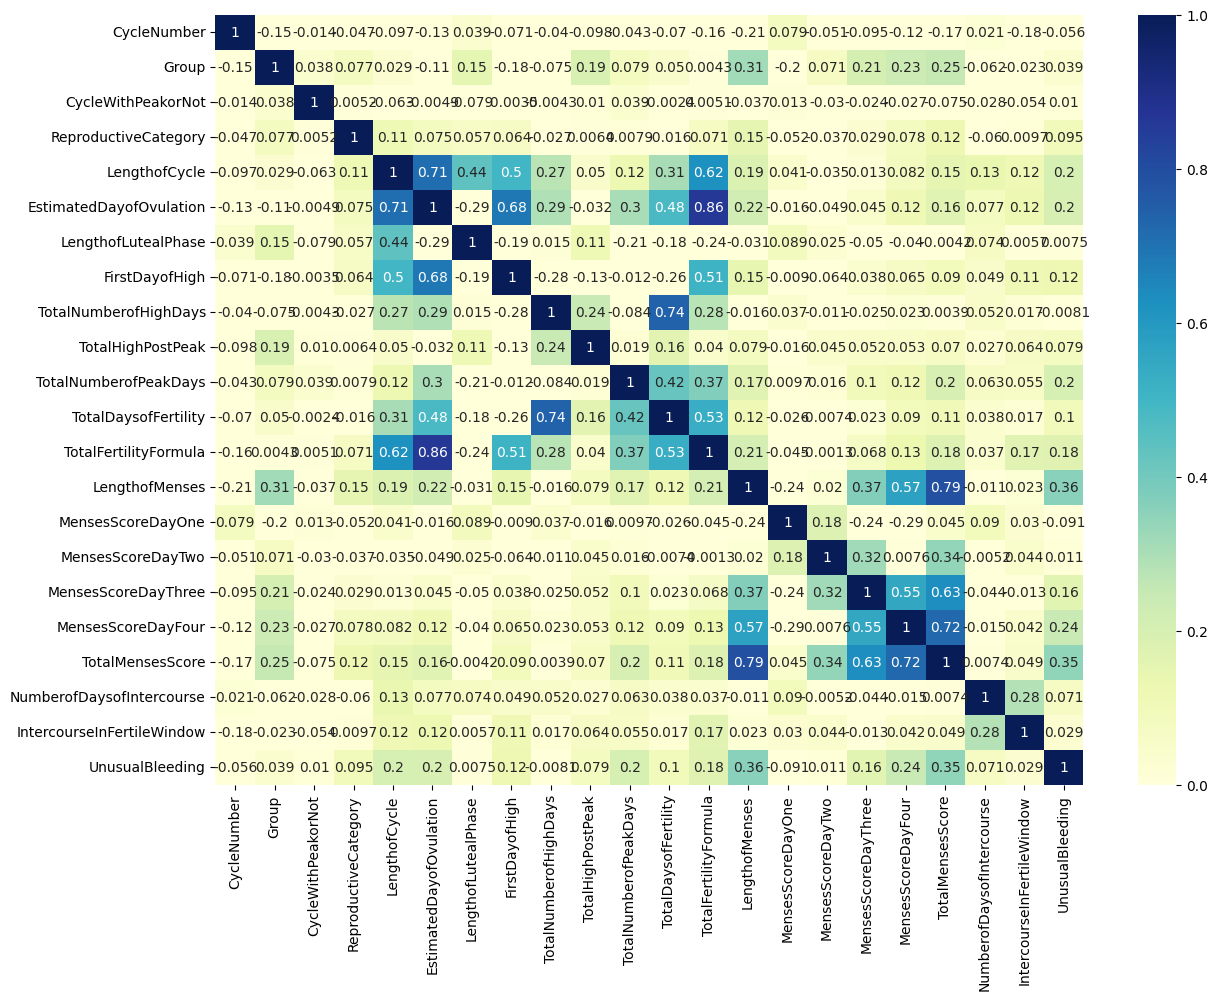

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(cycle_data_num.corr(), annot=True, vmin= 0, cmap='YlGnBu')